<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_out_2020/blob/main/PSD_GRAIN_NOT_GRAIN_out_19_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd

In [2]:
!pip install mahotas

In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020/
%cd marquesgabi_out_2020
from Get_PSDArea import PSDArea
from histogram import PSD

fatal: destination path 'marquesgabi_out_2020' already exists and is not an empty directory.
/content/marquesgabi_out_2020


In [5]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_out_2020/marquesgabi_fev_2020


In [6]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_out_2020/marquesgabi_fev_2020/Doutorado


In [7]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [8]:
!git clone https://github.com/marquesgabi/Doutorado
# %cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
df=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [df, df_new]
  df= pd.concat(frames, ignore_index=True)

fatal: destination path 'Doutorado' already exists and is not an empty directory.


In [9]:
!git clone https://github.com/ucfilho/marquesgabi_set_2020
%cd marquesgabi_set_2020

fatal: destination path 'marquesgabi_set_2020' already exists and is not an empty directory.
/content/marquesgabi_out_2020/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020


In [10]:
from big_segment import Segmenta  # got image provided segmented
from ANN_FIND_GRAIN import AnnGrain  # got image provided segmented
from psd_mahotas import Mahotas

In [11]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
ANN_dat=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [ANN_dat, df_new]
  ANN_dat= pd.concat(frames, ignore_index=True)

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_out_2020/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020/Doutorado


In [12]:
df=Segmenta(img)


In [13]:
print(df)

    Width           0           1  ...         781         782         783
0     196   84.306122   85.040817  ...  125.142853  130.428574  134.775513
1     100   91.995201  101.011200  ...   66.977592   65.395203   66.556801
2     190  117.676338  111.218498  ...   21.508144    5.626704    0.978283
3     156   46.051289   51.060490  ...  120.435242  121.882324  100.186073
4     144   42.264664   43.665119  ...  166.092590  173.000000  175.726089
..    ...         ...         ...  ...         ...         ...         ...
45    120  121.701118  109.305557  ...    1.661111    1.781111    1.548889
46    123   19.984070   20.958757  ...   45.724110   45.595284   44.513256
47    121   85.104980   83.282150  ...   78.036751   78.691689   79.919067
48    143    1.314441    1.829283  ...   79.989540   80.371559   82.345932
49    189   94.670784   99.096031  ...    6.207133    6.124828    6.080933

[150 rows x 785 columns]


In [14]:
y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 


Epoch 1/200
11/11 [==============================] - 0s 2ms/step - loss: 12.5408 - accuracy: 0.4519 
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 0.7971 - accuracy: 0.5015
Epoch 3/200
11/11 [==============================] - 0s 3ms/step - loss: 0.5865 - accuracy: 0.5539
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 0.6499 - accuracy: 0.5714
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 0.7664 - accuracy: 0.5044
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 0.8608 - accuracy: 0.5627
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.5015
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.7551
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 0.7285 - accuracy: 0.5160
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4887 - accuracy: 0.6910
Epoch 1

In [15]:
y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 


Epoch 1/200
11/11 [==============================] - 0s 2ms/step - loss: 5.8598 - accuracy: 0.4548 
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 1.1524 - accuracy: 0.4898
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 1.9026 - accuracy: 0.4956
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2563 - accuracy: 0.4956
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 0.7419 - accuracy: 0.5948
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0608 - accuracy: 0.4956
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.5335
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 1.1248 - accuracy: 0.5335
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 0.9196 - accuracy: 0.4956
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 0.5515 - accuracy: 0.6880
Epoch 11

In [16]:
print(confusion_matrix)

Predicted   0   1
Actual           
0          17  55
1           0  75


In [17]:
df.shape

(150, 785)

In [18]:
# open file to get df 
# use df and ANN to get grains and no grains
# use grains to obtain psd

In [19]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_out_2020/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020/Doutorado/Doutorado


In [20]:
k=0
for Item in img_name:
  print(k,Item)
  k=k+1

img=ww[21]


0 Fotos_Grandes-3cdAmostra/Q6-8-4.jpg
1 Fotos_Grandes-3cdAmostra/Q6-5-3.jpg
2 Fotos_Grandes-3cdAmostra/Q6-7-4.jpg
3 Fotos_Grandes-3cdAmostra/Q6-8-2.jpg
4 Fotos_Grandes-3cdAmostra/Q6-3-2.jpg
5 Fotos_Grandes-3cdAmostra/Q6-7-2.jpg
6 Fotos_Grandes-3cdAmostra/Q6-4-4.jpg
7 Fotos_Grandes-3cdAmostra/Q6-9-5.jpg
8 Fotos_Grandes-3cdAmostra/Q6-2-5.jpg
9 Fotos_Grandes-3cdAmostra/Q6-8-3.jpg
10 Fotos_Grandes-3cdAmostra/Q6-9-3.jpg
11 Fotos_Grandes-3cdAmostra/Q6-1-2.jpg
12 Fotos_Grandes-3cdAmostra/Q6-6-3.jpg
13 Fotos_Grandes-3cdAmostra/Q6-3-4.jpg
14 Fotos_Grandes-3cdAmostra/Q6-1-4.jpg
15 Fotos_Grandes-3cdAmostra/Q6-6-2.jpg
16 Fotos_Grandes-3cdAmostra/Q6-4-3.jpg
17 Fotos_Grandes-3cdAmostra/Q6-7-3.jpg
18 Fotos_Grandes-3cdAmostra/Q6-2-2.jpg
19 Fotos_Grandes-3cdAmostra/Q6-9-2.jpg
20 Fotos_Grandes-3cdAmostra/Q6-1-5.jpg
21 Fotos_Grandes-3cdAmostra/Q6-6-5.jpg
22 Fotos_Grandes-3cdAmostra/Q6-2-1.jpg
23 Fotos_Grandes-3cdAmostra/Q6-5-2.jpg
24 Fotos_Grandes-3cdAmostra/Q6-4-1.jpg
25 Fotos_Grandes-3cdAmostra/Q6-3-1.

In [21]:
df=Segmenta(img)

In [22]:
y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 

Epoch 1/200
11/11 [==============================] - 0s 2ms/step - loss: 3.8635 - accuracy: 0.4752
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 2.2184 - accuracy: 0.4956
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 4.0180 - accuracy: 0.5073
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 5.1000 - accuracy: 0.4956
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 5.8662 - accuracy: 0.4956
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 5.7100 - accuracy: 0.4956
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 5.1832 - accuracy: 0.4956
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 4.5345 - accuracy: 0.4956
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 3.8220 - accuracy: 0.4956
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 3.0652 - accuracy: 0.4956
Epoch 11/

In [23]:
# print(y_pred.ravel())

In [24]:
Grain=[]; Ind=[]; Size=[]
k=0
for item in y_pred:
  if(item == 0):
    Ind.append(k)
  k=k+1

df = df.reset_index(drop=True)

df_size = df.drop(df.index[Ind])

Width=np.array(df_size['Width'])

# print(Width)

# print(df_size.shape)

In [25]:
# pd.set_option('display.max_rows', None)
# print(df_size)

In [26]:
# print(len(y_pred.ravel()))

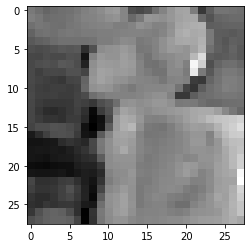

In [27]:
Size=28
qual_img=40
L = Width[qual_img]
data=np.array(df_size.drop('Width',axis=1).iloc[qual_img]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)
img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.imshow(Foto, cmap = "gray")

In [28]:
mean_value = np.mean(img)
img_new = img.copy()

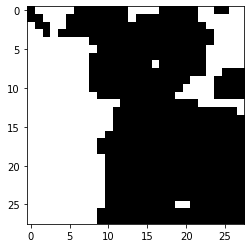

In [29]:

for i in range(28):
  for j in range(28):
    if img[i,j] < mean_value:
      img_new[i,j] = 255
    else:
      img_new[i,j] = 0

img28=cv2.resize(img_new,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.imshow(Foto, cmap = "gray")


In [30]:
L = Width[qual_img]
Area = np.sum(img_new) / (255.0 * 28 * 28)* L*L
print(Area)

14785.571428571428


In [31]:
Area_All, Diameter_All=PSDArea(df_size) 


In [32]:
df_size.shape

(147, 785)

In [33]:
# print(Area_All)
print(Diameter_All)

[1.7317656954068619, 1.2756952058273132, 1.5382264225009117, 1.3546260738185694, 1.4573426448760778, 1.2308650356815305, 1.732880548122804, 1.5106701710930137, 0.9838847094001871, 1.9873949401038007, 0.9835512655615164, 1.1339261957656552, 0.9729425120260468, 1.3753085317871154, 1.7003632853695085, 1.6249537031046053, 1.5307058896507544, 1.525797276414179, 1.591382851512374, 1.5784225677409511, 1.5785281663627437, 1.3852790236009127, 1.3618399232272307, 0.7720831827363842, 1.3445128572652354, 0.8962375249000191, 1.5229960827993683, 1.3254133549533058, 1.6890962017595075, 1.7073197038966221, 1.3925343937323387, 0.8190994683390708, 1.0077260083475712, 1.5930094387750735, 1.2493675395331667, 1.5210112204807433, 1.0588608883201178, 1.2257790134034545, 1.4403210231144288, 1.0349709037596682, 1.502409203458156, 1.2628538658238924, 1.0050210865110256, 1.9062498116188078, 1.8101492774503714, 1.049679562928657, 1.4360510935364743, 1.1886229245426678, 1.3351360434770179, 1.7783273212149993, 1.00

In [34]:
'''
d = 1.6343255246592054
r = d / 2.0
Area = np.pi * d**2 / 4; print('Area=',Area)
'''

"\nd = 1.6343255246592054\nr = d / 2.0\nArea = np.pi * d**2 / 4; print('Area=',Area)\n"

In [35]:
diam = Diameter_All.copy()
PSD_value = PSD(diam)
print(PSD_value)

[ 0  0  0  0  0  6 16 33 92]


In [41]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
df_imageJ = pd.read_csv(PSD_imageJ)
print(df_imageJ.head(3))

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 83 (delta 42), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (83/83), done.
/content/marquesgabi_out_2020/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020/Doutorado/Doutorado/marquesgabi_out_2020/marquesgabi_out_2020/marquesgabi_out_2020/marquesgabi_out_2020
  Unnamed: 0 Unnamed: 1        Unnamed: 2
0                  Area                 d
1          1      2,001  50.4752649569572
2          2      0.820  1.02179080270499


In [42]:
df_imageJ.shape

(25, 3)

In [53]:
df_imageJ['Unnamed: 1']
Area = []; k = 0
diam = []
for item in df_imageJ['Unnamed: 1']:
  if k > 0:
    value =item.replace(',','.')
    Area.append(float(value))
    d = (4*float(value)/np.pi)**0.5
    diam.append(d)
  k = k +1
PSD_new = pd.DataFrame({'Area': Area, 'Diam':diam})
print(PSD_new)

     Area      Diam
0   2.001  1.596168
1   0.820  1.021791
2   1.270  1.271619
3   0.958  1.104429
4   1.162  1.216349
5   2.014  1.601345
6   1.078  1.171560
7   1.234  1.253466
8   1.262  1.267607
9   1.347  1.309601
10  1.313  1.292967
11  2.449  1.765832
12  1.445  1.356404
13  1.209  1.240704
14  3.564  2.130217
15  1.590  1.422832
16  0.891  1.065109
17  1.329  1.300821
18  1.403  1.336546
19  0.626  0.892775
20  1.650  1.449429
21  1.551  1.405274
22  2.118  1.642170
23  1.194  1.232983


In [54]:
PSD_new = PSD(PSD_new['Diam'])
print(PSD_new)

[ 0  0  0  0  0  0  1  4 19]
